In [25]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
data = pd.read_csv("../data/divorcios_violencia_intrafamiliar.csv")

num_observaciones = data.shape[0]  
num_variables = data.shape[1]

print(f"El conjunto de datos tiene {num_observaciones} observaciones y {num_variables} variables.")

El conjunto de datos tiene 15 observaciones y 80 variables.


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 80 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Año                                      15 non-null     int64
 1   Total_Divorcios_Republica                15 non-null     int64
 2   Total_Denuncias_Intrafamiliar_República  15 non-null     int64
 3   Guatemala_Divorcios                      15 non-null     int64
 4   Guatemala_Denuncias                      15 non-null     int64
 5   El Progreso_Divorcios                    15 non-null     int64
 6   El Progreso_Denuncias                    15 non-null     int64
 7   Sacatepéquez_Divorcios                   15 non-null     int64
 8   Sacatepéquez_Denuncias                   15 non-null     int64
 9   Chimaltenango_Divorcios                  15 non-null     int64
 10  Chimaltenango_Denuncias                  15 non-null     int64
 11  Escuintl

In [10]:
print(data.describe(include="all"))

               Año  Total_Divorcios_Republica  \
count    15.000000                  15.000000   
mean   2015.000000                5693.533333   
std       4.472136                2147.193513   
min    2008.000000                2834.000000   
25%    2011.500000                4209.000000   
50%    2015.000000                5575.000000   
75%    2018.500000                6031.500000   
max    2022.000000                9950.000000   

       Total_Denuncias_Intrafamiliar_República  Guatemala_Divorcios  \
count                                15.000000            15.000000   
mean                              32307.133333          2138.733333   
std                                3557.935675           749.851077   
min                               23721.000000          1052.000000   
25%                               30787.000000          1679.500000   
50%                               31929.000000          2142.000000   
75%                               35218.500000          2223.

In [11]:

numeric_cols = data.select_dtypes(include=[np.number])
categorical_cols = data.select_dtypes(include=['object', 'category'])

numerical_summary = numeric_cols.describe()

numerical_table = tabulate(numerical_summary, headers=numerical_summary.columns, tablefmt="pretty")

normality_results = []

for col in numeric_cols.columns:
    stat, p_value = shapiro(numeric_cols[col].dropna())
    normality_results.append([col, f"{stat:.4f}", f"{p_value:.4f}", p_value > 0.05])

normality_table = tabulate(normality_results, headers=["Variable", "Estadístico", "p-valor", "¿Tiene distribución Normal?"], tablefmt="pretty")
print("\nPruebas de normalidad:\n", normality_table)



Pruebas de normalidad:
 +-----------------------------------------+-------------+---------+-----------------------------+
|                Variable                 | Estadístico | p-valor | ¿Tiene distribución Normal? |
+-----------------------------------------+-------------+---------+-----------------------------+
|                   Año                   |   0.9636    | 0.7545  |            True             |
|        Total_Divorcios_Republica        |   0.9073    | 0.1231  |            True             |
| Total_Denuncias_Intrafamiliar_República |   0.9336    | 0.3084  |            True             |
|           Guatemala_Divorcios           |   0.9022    | 0.1027  |            True             |
|           Guatemala_Denuncias           |   0.9584    | 0.6639  |            True             |
|          El Progreso_Divorcios          |   0.9261    | 0.2387  |            True             |
|          El Progreso_Denuncias          |   0.9233    | 0.2161  |            True          

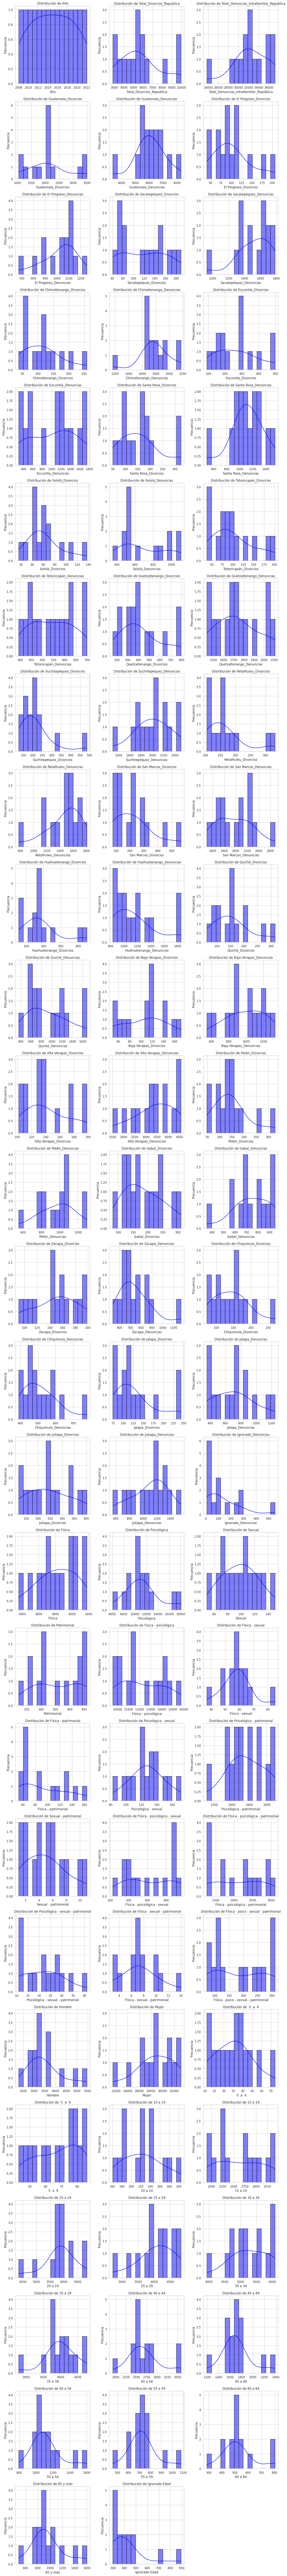

In [13]:


num_cols = 3  
num_rows = (len(numeric_cols.columns) + num_cols - 1) // num_cols

plt.figure(figsize=(15, num_rows * 5))
sns.set(style="whitegrid")


for i, col in enumerate(numeric_cols.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data[col], kde=True, color="blue", bins=15, edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')


plt.tight_layout()
plt.show()

c. Crucen las variables que consideren sean las más importantes para hallar los
elementos clave que permitan comprender lo que está causando el problema
encontrado.

In [14]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

In [15]:
# Ordenar las correlaciones con respecto a la variable "Total_Divorcios_Republica"
if 'Total_Divorcios_Republica' in data.columns:
    correlation_with_divorces = correlation_matrix['Total_Divorcios_Republica'].sort_values(ascending=False)
    print("Correlaciones con 'Total_Divorcios_Republica':")
    print(correlation_with_divorces)

Correlaciones con 'Total_Divorcios_Republica':
Total_Divorcios_Republica                1.000000
El Progreso_Divorcios                    0.978452
Quetzaltenango_Divorcios                 0.976327
Jalapa_Divorcios                         0.976150
Huehuetenango_Divorcios                  0.971355
                                           ...   
Jalapa_Denuncias                        -0.512486
Física - psicológica - sexual           -0.561527
Totonicapán_Denuncias                   -0.564566
Física - patrimonial                    -0.601733
Física - psico - sexual - patrimonial   -0.684004
Name: Total_Divorcios_Republica, Length: 80, dtype: float64


In [16]:
# Establecer un umbral de correlación
umbral_correlacion = 0.95  # Puedes ajustar este valor según sea necesario

# Filtrar las variables que tienen una correlación significativa con 'Total_Divorcios_Republica'
variables_importantes = correlation_with_divorces[correlation_with_divorces.abs() > umbral_correlacion]
print("Variables más importantes relacionadas con 'Total_Divorcios_Republica':")
print(variables_importantes)

Variables más importantes relacionadas con 'Total_Divorcios_Republica':
Total_Divorcios_Republica    1.000000
El Progreso_Divorcios        0.978452
Quetzaltenango_Divorcios     0.976327
Jalapa_Divorcios             0.976150
Huehuetenango_Divorcios      0.971355
Totonicapán_Divorcios        0.969920
Escuintla_Divorcios          0.964948
Petén_Divorcios              0.964122
Guatemala_Divorcios          0.964078
Sololá_Divorcios             0.960028
Quiché_Divorcios             0.954887
Name: Total_Divorcios_Republica, dtype: float64


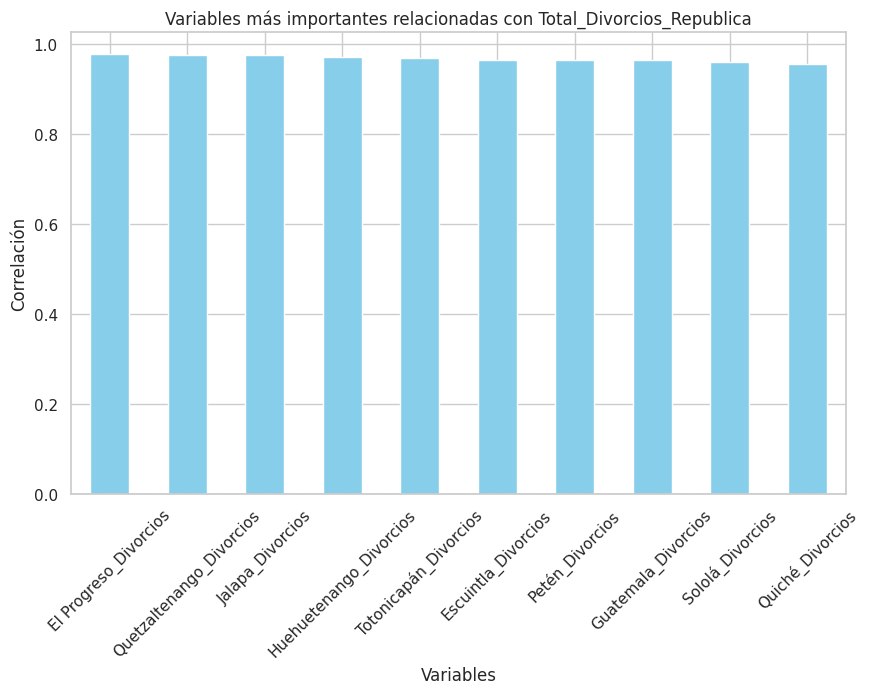

In [17]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
variables_importantes.drop('Total_Divorcios_Republica').plot(kind='bar', color='skyblue')
plt.title('Variables más importantes relacionadas con Total_Divorcios_Republica')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()

Las variables mostradas están fuertemente relacionadas entre sí, lo que indica que a medida que una variable aumenta, la otra también tiende a aumentar.

d. Realicen gráficos exploratorios que les dé ideas del estado de los datos.

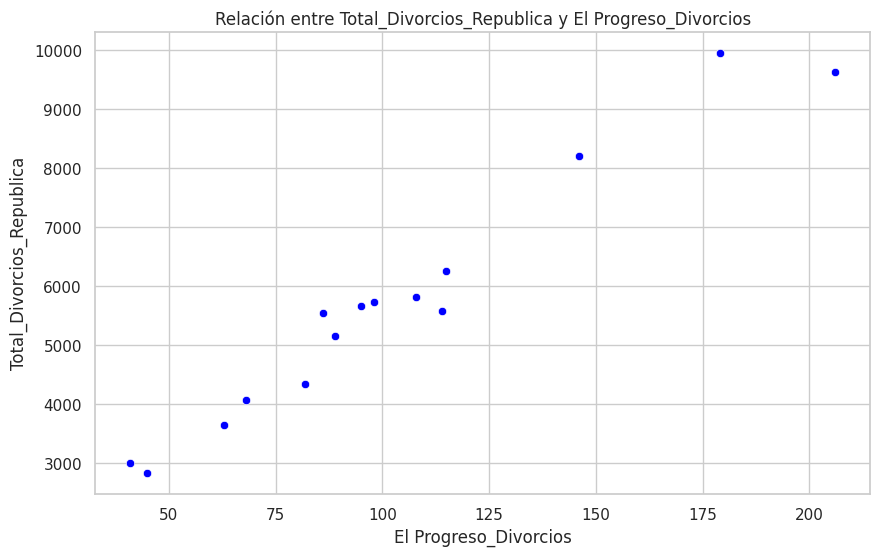

In [18]:
# Gráfico de dispersión entre Total_Divorcios_Republica y El Progreso_Divorcios
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='El Progreso_Divorcios', y='Total_Divorcios_Republica', color='blue')
plt.title('Relación entre Total_Divorcios_Republica y El Progreso_Divorcios')
plt.xlabel('El Progreso_Divorcios')
plt.ylabel('Total_Divorcios_Republica')
plt.show()

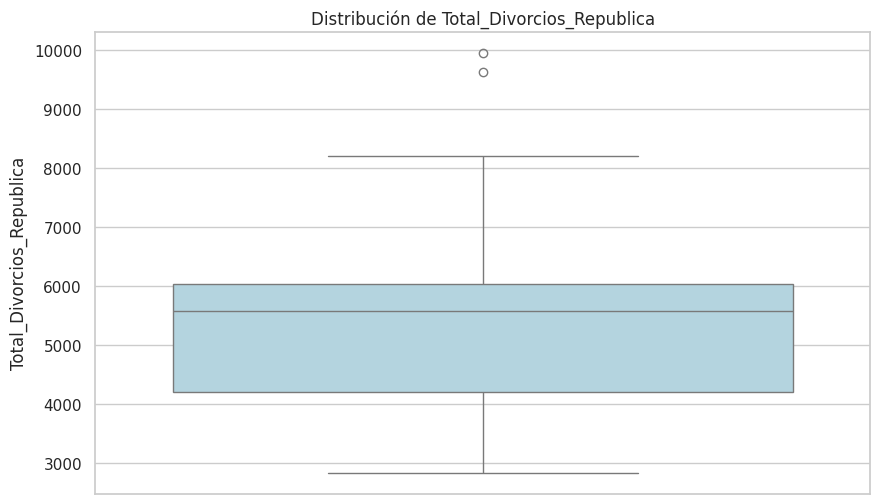

In [20]:
# Gráfico de cajas para visualizar la distribución de Total_Divorcios_Republica
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='Total_Divorcios_Republica', color='lightblue')
plt.title('Distribución de Total_Divorcios_Republica')
plt.ylabel('Total_Divorcios_Republica')
plt.show()

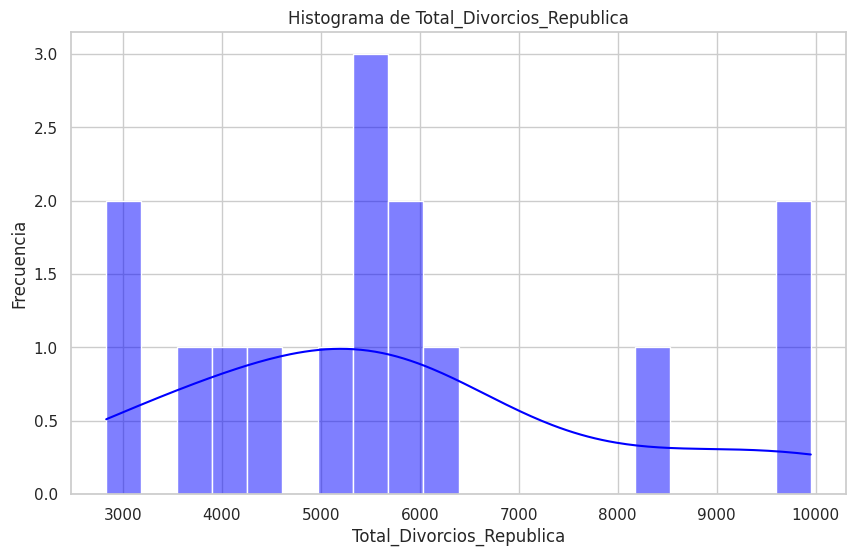

In [19]:
# Histograma de Total_Divorcios_Republica
plt.figure(figsize=(10, 6))
sns.histplot(data['Total_Divorcios_Republica'], bins=20, kde=True, color='blue')
plt.title('Histograma de Total_Divorcios_Republica')
plt.xlabel('Total_Divorcios_Republica')
plt.ylabel('Frecuencia')
plt.show()

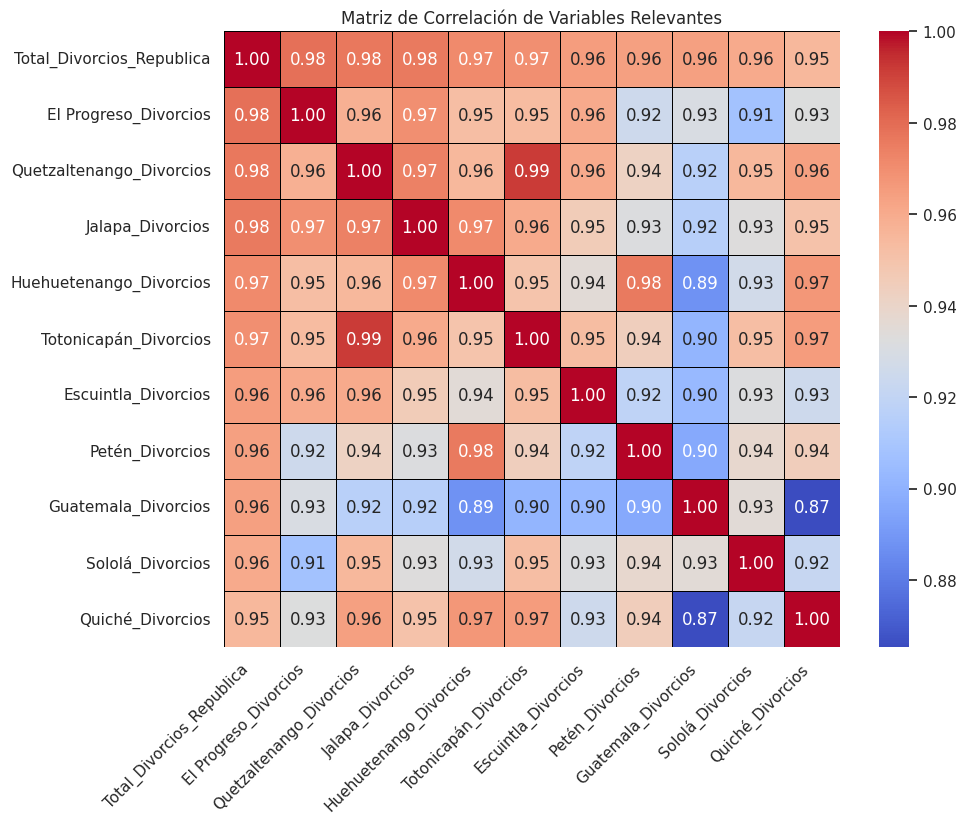

In [24]:
# Seleccionar las variables relevantes
variables_relevantes = data[['Total_Divorcios_Republica', 
                              'El Progreso_Divorcios', 
                              'Quetzaltenango_Divorcios', 
                              'Jalapa_Divorcios', 
                              'Huehuetenango_Divorcios', 
                              'Totonicapán_Divorcios', 
                              'Escuintla_Divorcios', 
                              'Petén_Divorcios', 
                              'Guatemala_Divorcios', 
                              'Sololá_Divorcios', 
                              'Quiché_Divorcios']]

# Calcular la matriz de correlación
correlation_matrix_relevantes = variables_relevantes.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_relevantes, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, linecolor='black')
plt.title('Matriz de Correlación de Variables Relevantes')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

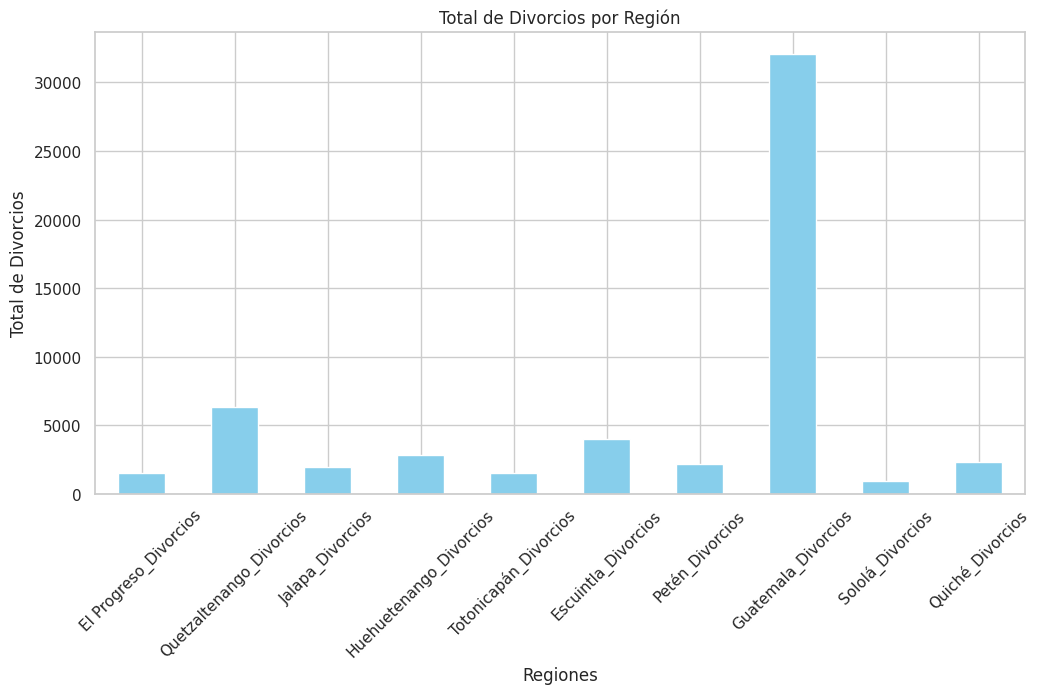

In [23]:
# Gráfico de barras para visualizar el número de divorcios por región
plt.figure(figsize=(12, 6))
data[['El Progreso_Divorcios', 'Quetzaltenango_Divorcios', 'Jalapa_Divorcios', 
      'Huehuetenango_Divorcios', 'Totonicapán_Divorcios', 'Escuintla_Divorcios', 
      'Petén_Divorcios', 'Guatemala_Divorcios', 'Sololá_Divorcios', 'Quiché_Divorcios']].sum().plot(kind='bar', color='skyblue')
plt.title('Total de Divorcios por Región')
plt.xlabel('Regiones')
plt.ylabel('Total de Divorcios')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Seleccionar todas las variables excepto la variable objetivo
X = data.drop(columns=['Total_Divorcios_Republica'])
y = data['Total_Divorcios_Republica']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio: {mse:.2f}")
print(f"R^2: {r2:.2f}")

Error Cuadrático Medio: 31359.06
R^2: 0.98


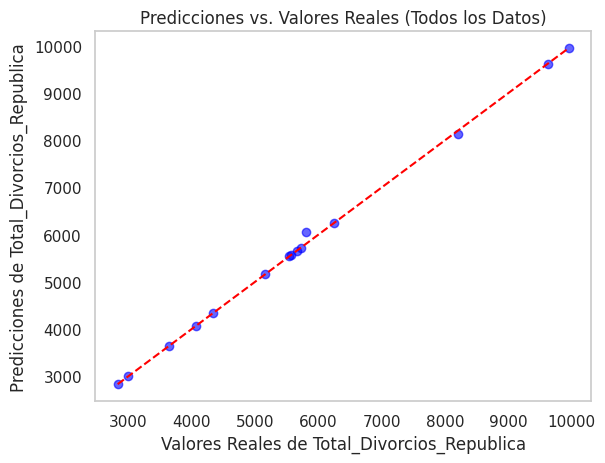

In [31]:
# gráfico de dispersión de las predicciones vs. los valores reales
plt.scatter(y, model.predict(X), color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Predicciones vs. Valores Reales (Todos los Datos)')
plt.xlabel('Valores Reales de Total_Divorcios_Republica')
plt.ylabel('Predicciones de Total_Divorcios_Republica')
plt.grid()
plt.show()